## Statistics

In [3]:
import math
import itertools
import statistics

### Question 1


In [29]:

microstates = (1, 0)


def get_states(N: int) -> set[tuple[int, ...]]:
    states = set()
    
    for combination in itertools.combinations_with_replacement(microstates, N):
        states.update(itertools.permutations(combination))

    return states



In [ ]:
a = get_states(50)
print('')


### Question 2

### Question 3

### Question 4

In [25]:
import matplotlib.pyplot as plt


def n_over_k(n, k):
    return math.perm(n, k) / math.factorial(k)


def plot_for_n(n):

    states = tuple(range(0, n + 1))
    combinations = tuple(n_over_k(n, k) for k in states)

    fig, ax = plt.subplots()

    colors=plt.cm.get_cmap('plasma', 170)
    ax.plot(states, combinations, color=colors(n), label=f'N={n}')

    ax.set_yscale('log')

    plt.legend()
    plt.show()


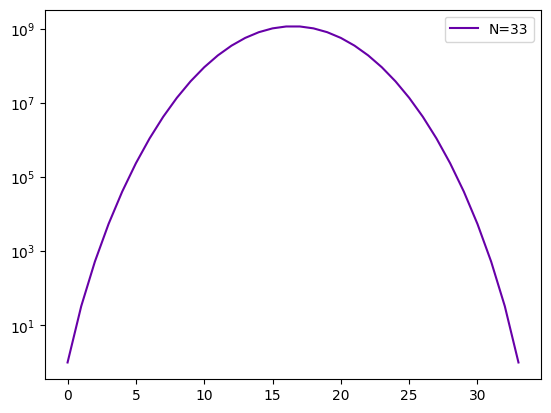

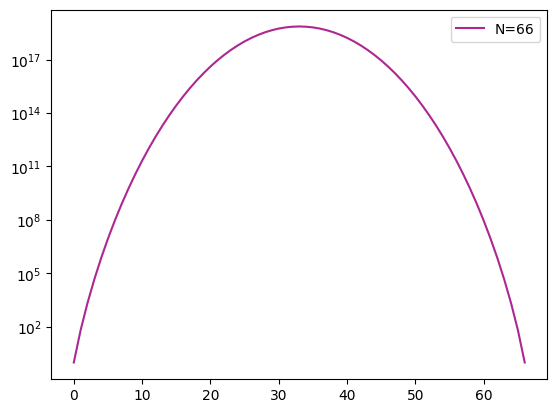

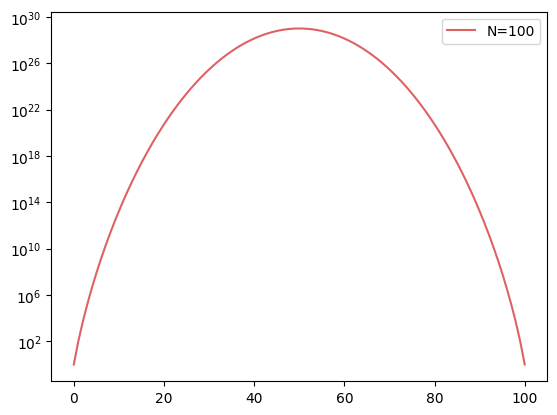

In [26]:

plot_for_n(33)
plot_for_n(66)
plot_for_n(100)


## Probabilities and Entropy

In [8]:
nia_alfonso = int('100429848'[-2:])
nia_daniel = int('100452279'[-2:])
nia_alvaro = int('100454417'[-2:])
nia_luis = int('100454766'[-2:])


M = statistics.mean([nia_alfonso, nia_daniel, nia_alvaro, nia_luis])
M = int(M)  # TODO: is this adequate?
N = int(100 + M)


def p(k, N=N):
    return n_over_k(N, k) / math.pow(2, N)


kb = 1.380649e-23 #m2 kg s-2 K-1

def s(states):
    return kb * math.log(states)

### Question 1

In [9]:
p(10)

2.3484111117883076e-31

### Question 2

In [10]:
hN = int(N/2)

p(hN)

0.06461062952195763

### Question 3

In [11]:
(p(hN + 5) - p(hN - 5))

0.0

### Question 4

In [12]:
(p(hN + 25) - p(hN - 25))

0.0

### Question 5

In [13]:
states1 = n_over_k(N, hN + 10)
states2 = n_over_k(N, hN)

(abs(s(states1) - s(states2)))

1.8099190638084746e-23

### Question 6

In [14]:
states1 = n_over_k(N, hN + 5)
states2 = n_over_k(N, hN)
(abs(s(states1) - s(states2)))

4.5150782050146284e-24

### Question 7

In [15]:
states1 = n_over_k(N, hN)
states2 = n_over_k(N, 2)
(abs(s(states1) - s(states2)))

1.2877448793062366e-21

### Question 9

In [16]:
p1 = p(hN)
p2 = p(M)

(p1/p2)

2117.392713433445